# Random Forest
- Ensemble Algorithm
- model made up of many decision trees

Key Concepts:
- While building trees it performs random sampling of training data points
- While splitting nodes it performs random subsets of features 

### Random sampling of training observations
While Training:
- each tree in a random forest learns from a random sample of the data points
- BOOTSTRAPPING - means that some samples will be used multiple times in a single tree
- each tree might have high variance w.r.t to a particular training data, however overall variance will be low without increasing the bias

While Testing:
- predictions are made by averaging the predictions of each decision tree
- BAGGING - procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions


### Random Subsets of features for splitting nodes
- subset of all the features are considered for splitting each node in each decision tree
- generally this subset is equal to sqrt(n_features)
- E.g: Total 25 features at each node in each tree, only 5 features will be considered in splitting the node


#### Understanding Random Forest(Example)
- to predict a company A stock will go up or down
- a team of analysts is formed having no idea about the company A
- Each analyst has low bias as they dont have any prior assumption
- they will learn from news reports datasets
- These news reports may have high noise or irrelevant data
- analysts are prone to capture these noise
- each analyst might have different prediction with high variance based on different training set of reports
- allow each analyst access to section of reports
- the noise in these section will cancelled out while sampling

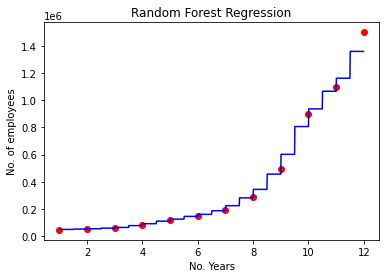

In [7]:
# Random Forest Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Regression/Company_Performance.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict([[6.5]])

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('No. Years')
plt.ylabel('No. of employees')
plt.show()

In [3]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('Data/Classification/BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.svm import SVC
svm_ker = SVC(kernel = 'rbf', random_state = 42)
svm_ker.fit(X_train, y_train)

pred_test = svm_ker.predict(X_test)

from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, pred_test)
print(test_acc)


# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_c.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_c.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(test_acc)

0.9271137026239067
0.9416909620991254


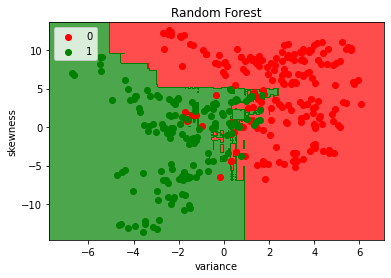

In [6]:
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = rf_c
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()